## Figure Generation Notebook
The role of this notebook is two-fold:
- Double check and print basic information on the pickled result from the analysis
- Generate the raw figure to be stiched together in BioRender

Make sure that you transfered the right files from the cluster onto your laptop using Globus file transfer.

In [1]:
import pickle

import pandas as pd
import numpy as np

import os
import sys

# Add the directory containing your module to the Python path (wants absolute paths)
# Here we add to the path everything in the top level
scriptpath = "../" 
sys.path.append(os.path.abspath(scriptpath))

from commons import load_pickle, find_best_model

# Path Initiatilization
PICKLE_PATH = "C:/Users/User/Documents/1_MASTER/LAB/AEC_PLI/results/" 
RESULT_PATH = "C:/Users/User/Documents/1_MASTER/LAB/AEC_PLI/results/" 

# Experiment Variables Initialization
EPOCHS = ["emf5", "eml5"]
GRAPHS = ["aec", "pli"]
FEATURES = ["func"]

# Get an overview of each epoch/graph performance
for epoch in EPOCHS:
    for graph in GRAPHS:
        # Load the classifier result
        clf_path = f"{PICKLE_PATH}best_clf_{graph}_{epoch}_func.pickle"
        clf_result = load_pickle(clf_path)
        
        # Pretty Print the Result
        print(f"Classifier Result for {epoch} at {graph}")
        accuracies = clf_result['accuracies']
        
        for idx, accuracy in enumerate(accuracies):
            print(f"Participant #{idx} accuracy: {accuracy}")
        print(f"Mean Accuracy : {np.mean(accuracies)}")
        
        total_conf_matrix = np.zeros([2, 2])
        for conf_matrix in clf_result['cms']:
            total_conf_matrix = total_conf_matrix + np.array(conf_matrix)
        
        print(f"Total Confusion Matrix: \n{total_conf_matrix}")
        
        print("Classifier Parameter count: ")
        best_clf = find_best_model(clf_result['best_params'])

Classifier Result for emf5 at aec
Participant #0 accuracy: 0.9827586206896551
Participant #1 accuracy: 0.9827586206896551
Participant #2 accuracy: 0.9568965517241379
Participant #3 accuracy: 0.8859649122807017
Participant #4 accuracy: 0.711864406779661
Participant #5 accuracy: 0.803921568627451
Participant #6 accuracy: 0.9743589743589743
Participant #7 accuracy: 0.8018018018018018
Participant #8 accuracy: 0.9830508474576272
Mean Accuracy : 0.8981529227121849
Total Confusion Matrix: 
[[441.  56.]
 [ 47. 484.]]
Classifier Parameter count: 
##################################################
{'clf': SVC(C=0.5, max_iter=10000), 'clf__C': 0.5, 'clf__kernel': 'rbf'}
##################################################
{'clf': SVC(C=0.5, max_iter=10000), 'clf__C': 0.4, 'clf__kernel': 'rbf'}
##################################################
{'clf': SVC(C=0.5, max_iter=10000), 'clf__C': 0.4, 'clf__kernel': 'rbf'}
##################################################
{'clf': SVC(C=0.5, max_iter=10000

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator SVC from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#from utils import load_pickle
from commons import load_pickle

IN_DIR = "C:/Users/User/Documents/1_MASTER/LAB/AEC_PLI/results/" 
RESULT_PATH = "C:/Users/User/Documents/1_MASTER/LAB/AEC_PLI/results/" 

EPOCHS = ["emf5" "eml5"]
GRAPHS = ["aec" "pli"]
FEATURES = ["func"]

def save_figure(fig_name, dpi=500):
    """ Helper to save the figure with the right fig_name and the right dpi"""
    fig = plt.gcf()
    plt.show()
    fig.set_size_inches((8, 8), forward=False)
    fig.savefig(fig_name, dpi=dpi)

In [31]:
for epoch, cur_condition in zip(['emf5','eml5'], ['Deep','Light']):
    bootstrap = load_pickle(f"{IN_DIR}bootstrap_{graph}_{epoch}_func.pickle")
    permutation = load_pickle(f"{IN_DIR}permutation_{graph}_{epoch}_func.pickle")

pd.DataFrame(permutation).head()

,0
0,0.515570
1,0.515570
2,0.521067
3,0.516659
4,0.515570


In [9]:
# We want to make the violin plot of the distribution between the binary and weighted graph for aec and pli

dark_purple = (0.28645868165429034, 0.17570375961380752, 0.3440754090644915) # used for weighted
light_purple = (0.6196337473419887, 0.3684648209452393, 0.5405540573846532) # used for binary
beige = (0.8454263141680334, 0.6225806657605325, 0.6651572981499156) # used for functional connectivity only

for graph in ['aec', 'pli']:
    data = {
        'Accuracy': [],
        'Graph Type': [],
        'Condition': []
    }
    for epoch, cur_condition in zip(['emf5','eml5'], ['Deep','Light']):
        bin_bootstrap = load_pickle(f"{IN_DIR}/bootstrap_{graph}_{epoch}_bin.pickle")
        wei_bootstrap = load_pickle(f"{IN_DIR}/bootstrap_{graph}_{epoch}_wei.pickle")

        # I need to first take the data and put it in a dataframe
        bin_label = ['binarized' for x in bin_bootstrap['distribution']]
        wei_label = ['weighted' for x in wei_bootstrap['distribution']]
        condition = [cur_condition for x in wei_bootstrap['distribution']]*2

        data['Accuracy'] = data['Accuracy'] + bin_bootstrap['distribution'] + wei_bootstrap['distribution']
        data['Graph Type'] = data['Graph Type'] + bin_label + wei_label
        data['Condition'] = data['Condition'] + condition
        
        print(epoch, cur_condition, " BIN: ", str(np.mean(bin_bootstrap['distribution'])), " WEI:", str(np.mean(wei_bootstrap['distribution'])))

    colors = [light_purple, dark_purple]# Set your custom color palette
    sns.set_context("poster")
    sns.set_palette(sns.color_palette(colors))
    sns.set_style("whitegrid",{'axes.grid' : False})
    df = pd.DataFrame (data, columns = ['Accuracy','Graph Type', "Condition"])
    ax = sns.violinplot(data=df, x='Condition', y='Accuracy', hue="Graph Type")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set(xticklabels=[])
    ax.legend_.remove()
    ax.set_ylim(0.40, 0.75)
    
    save_figure(f"{OUT_DIR}{graph}_bin_vs_wei.png")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/User/Desktop/result_aec_wpli/bootstrap_aec_emf5_bin.pickle'

AttributeError: 'NoneType' object has no attribute 'remove'

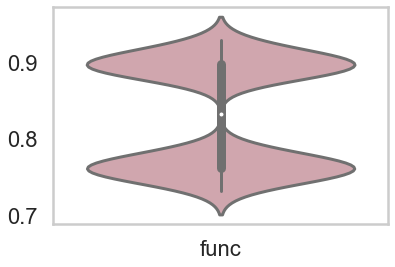

In [18]:
dark_purple = (0.28645868165429034, 0.17570375961380752, 0.3440754090644915) # used for weighted
light_purple = (0.6196337473419887, 0.3684648209452393, 0.5405540573846532) # used for binary
beige = (0.8454263141680334, 0.6225806657605325, 0.6651572981499156) # used for functional connectivity only

# Generate the violin plot for all func bootstrap
# TODO: I'm missing func-bin
for graph in ['aec', 'pli']:
    data = {
        'Accuracy': [],
        'Graph Type': [],
        'Condition': []
    }
    
    for epoch, cur_condition in zip(['emf5','eml5'], ['Deep','Light']):
        func_bootstrap = load_pickle(f"{IN_DIR}bootstrap_{graph}_{epoch}_func.pickle")
        
        # I need to first take the data and put it in a dataframe
        func_label = ['func' for x in func_bootstrap['distribution']]
        
        data['Accuracy'] = data['Accuracy'] + func_bootstrap['distribution']
        data['Graph Type'] = data['Graph Type'] + func_label
        
    colors = [beige, light_purple, dark_purple]# Set your custom color palette
    sns.set_context("poster")
    sns.set_palette(sns.color_palette(colors))
    sns.set_style("whitegrid",{'axes.grid' : False})
    df = pd.DataFrame (data, columns = ['Accuracy','Graph Type'])
    ax = sns.violinplot(data=df, y='Accuracy', x="Graph Type")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend_.remove()
    ax.set_ylim(0.55, 0.95)
    save_figure(f"{OUT_DIR}{graph}_func_vs_bin_vs_wei.png")

In [14]:
# Make the stacked bar plot for the deep and ligh for random with and without func-wei (three way stacked)
# Will do it for deep and aec

# Colors
random_color = "#ebebeb"
aec_color = "#ffe6e5"
aec_improvement_color = "#ffcccb"
pli_color = "#e0f0f5"
pli_improvement_color = "#add8e6"

random_acc = []
func_acc = []
y_err = []

for epoch in ['emf5', 'eml5']:
    for graph in ['aec', 'pli']:
        permutations = load_pickle(f"{IN_DIR}permutation_{graph}_{epoch}_func.pickle")
        func_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func.pickle")
        
        # Next up we will do a comparison plot of each permutation tests iteration
        random_acc = random_acc + [np.mean(permutations)]
        func_acc = func_acc + [np.mean(func_clf['accuracies']) - np.mean(permutations)]
        wei_acc = wei_acc + [np.mean(wei_clf['accuracies']) - (np.mean(func_clf['accuracies']))]

        y_err = y_err + [np.std(permutations)]
        
        print(epoch, graph, "func: ", str(np.mean(func_clf['accuracies'])), " WEI:", str(np.mean(wei_clf['accuracies'])))

        
ind = np.arange(4)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

sum_list = []
for (func, rand) in zip(func_acc, random_acc):
    sum_list.append(func+rand)
    
fix_wei_acc = []
for wei in wei_acc:
    
    if wei < 0:
        wei = 0
    fix_wei_acc.append(wei)

p1 = plt.bar(ind, random_acc, width, yerr=y_err)
p2 = plt.bar(ind, func_acc, width, bottom=random_acc)
p3 = plt.bar(ind, fix_wei_acc, width, bottom=sum_list)



#plt.xticks(ind, ('Healthy', 'MSK', 'Both'))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim((0.45, 0.95))
plt.xticks([])


# Setting up the colors
[p1[i].set_color(random_color) for i in range(4)]
p2[0].set_color(aec_color)
p2[1].set_color(pli_color)
p2[2].set_color(aec_color)
p2[3].set_color(pli_color)


p3[3].set_color(pli_improvement_color)

save_figure(f"{OUT_DIR}improvement_by_wei.png")

print("Random:")
print(random_acc)
print("Accuracies")
print(func_clf['accuracies'])
print(wei_clf['accuracies'])
print(np.std(permutations))
print(fix_wei_acc)

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/User/Desktop/result_aec_wpli/best_clf_aec_emf5_func-wei.pickle'

In [15]:
# In this one we want to reproduce the accuracy improvement for each participant given by weighted features
flatui = ["#ff4038", "#59afca",  "#ff9d99", "#b6dce7"]
wei_improvements = []
index = 0
for epoch in ['emf5', 'eml5']:
    for graph in ['aec', 'pli']:
        wei_improvement = []
        func_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func.pickle")
        wei_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func-wei.pickle")
        
        for func, wei in zip(func_clf['accuracies'], wei_clf['accuracies']):
            wei_improvement.append(wei-func)
        
        print(wei_improvement)
        print("======")
        plt.scatter([1,2,3,4,5,6,7,8,9], wei_improvement, color=flatui[index])
        index = index + 1
        wei_improvements.append(wei_improvement)

plt.plot([1,2,3,4,5,6,7,8,9], [0,0,0,0,0,0,0,0,0], 'k--')
plt.yticks(np.arange(-0.08, 0.15, 0.05))
plt.xticks(np.arange(1,10,1))
print("emf5+aec", "emf5+pli", "eml5+aec", "eml5+pli")
save_figure(f"{OUT_DIR}participant_improvement_by_wei.png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/User/Desktop/result_aec_wpli/best_clf_aec_emf5_func-wei.pickle'

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551

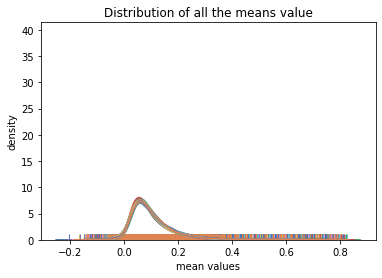

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\seaborn\distributions.py:2551

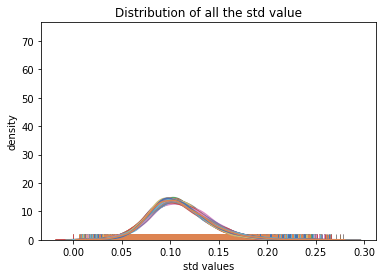

In [19]:
# here the goal is to plot the distribution of each feature
# This will be a bit difficult since we do have a lot of feature, but we can group them together

sns.set_palette(sns.color_palette("deep", 82))


# distribution of all the 82 means
df = pd.read_csv(f"{IN_DIR}features.csv")

for id in range(1,83):
    values = df[f"mean_{id}"]
    ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("mean values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the means value")
save_figure(f"{OUT_DIR}means_distribution.png")

# distribution of all the 82 std
for id in range(1,83):
    values = df[f"std_{id}"]
    ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("std values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the std value")
save_figure(f"{OUT_DIR}std_distribution.png")

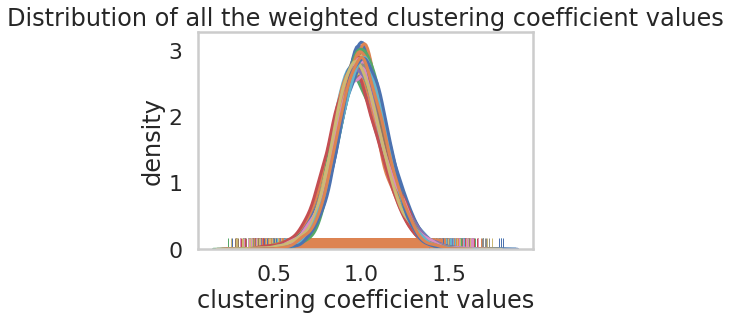

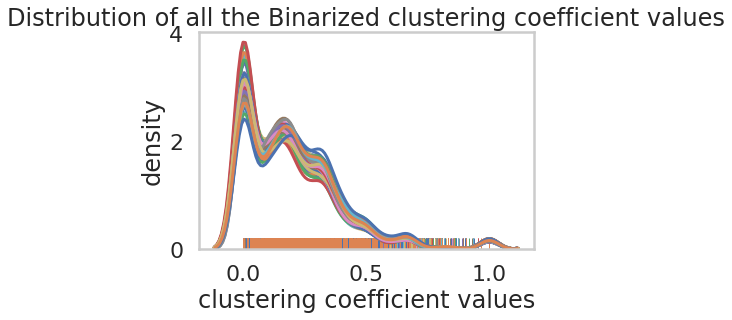

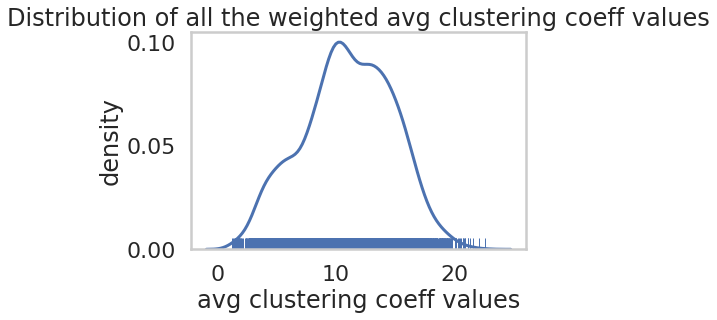

In [35]:
# distribution of all the 82 clustering coefficient weighted
for id in range(1,83):
    values = df[f"wei_clust_coeff_ {id}"]
    ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("clustering coefficient values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted clustering coefficient values")
save_figure(f"{OUT_DIR}wei_clust_coeff_distribution.png")

# distribution of all the 82 clustering coefficient binarized
for id in range(1,83):
    values = df[f"bin_clust_coeff_ {id}"]
    ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("clustering coefficient values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the Binarized clustering coefficient values")
save_figure(f"{OUT_DIR}bin_clust_coeff_distribution.png")

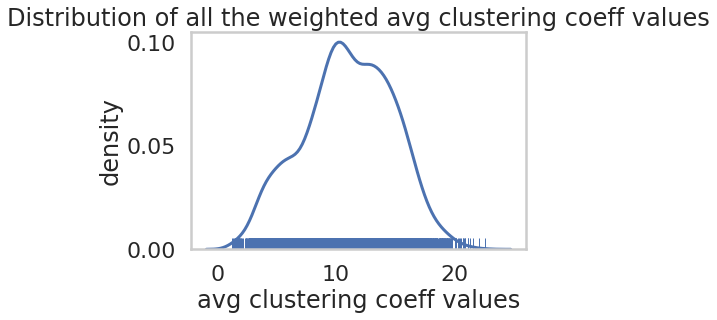

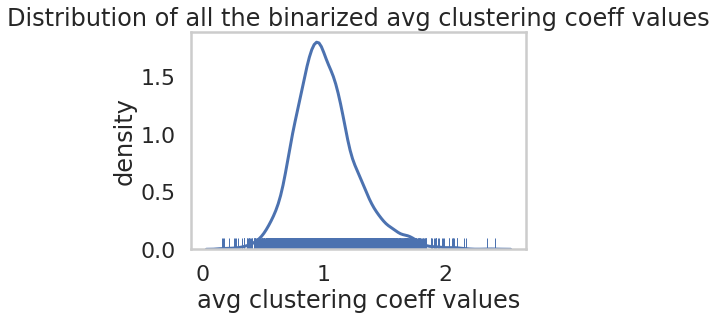

In [36]:
# distribution of all the avg norm clust coeff efficiency
values = df[f"wei_norm_avg_clust_coeff"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("avg clustering coeff values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted avg clustering coeff values")
save_figure(f"{OUT_DIR}wei_norm_avg_clust_coeff_distribution.png")

values = df[f"bin_norm_avg_clust_coeff"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("avg clustering coeff values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the binarized avg clustering coeff values")
save_figure(f"{OUT_DIR}bin_norm_avg_clust_coeff_distribution.png")


# distribution of the community
# distribution of global efficiency: []_norm_g_eff
# distribution of the small worldness



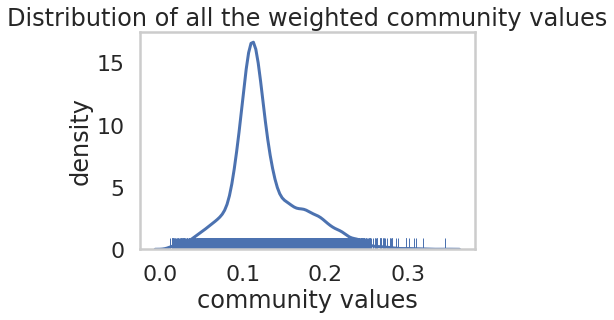

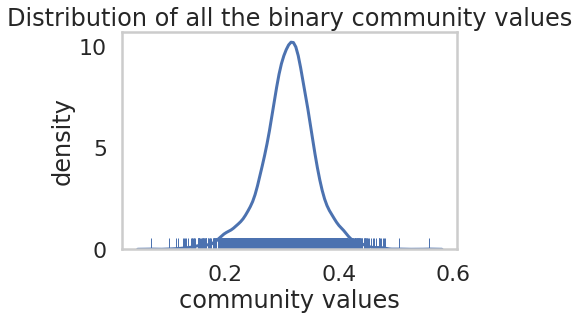

In [42]:
# distribution of the community
values = df[f"wei_community"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("community values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted community values")
save_figure(f"{OUT_DIR}wei_community_distribution.png")

values = df[f"bin_community"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("community values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the binary community values")
save_figure(f"{OUT_DIR}bin_community_distribution.png")

# distribution of global efficiency: []_norm_g_eff
# distribution of the small worldness


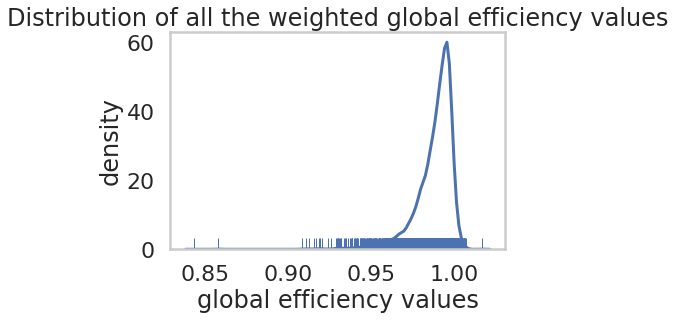

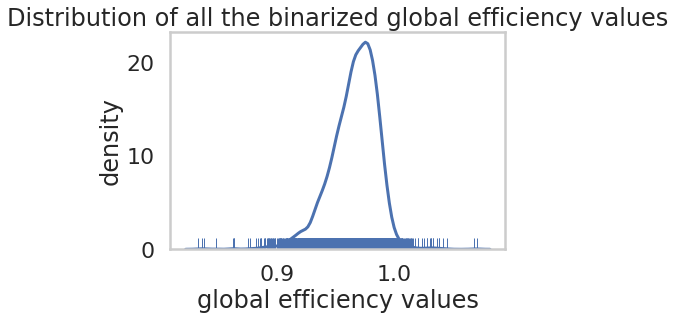

In [43]:
# distribution of global efficiency: []_norm_g_eff
values = df[f"wei_norm_g_eff"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("global efficiency values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted global efficiency values")
save_figure(f"{OUT_DIR}wei_g_eff.png")

values = df[f"bin_norm_g_eff"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("global efficiency values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the binarized global efficiency values")
save_figure(f"{OUT_DIR}bin_g_eff.png")

# distribution of the small worldness

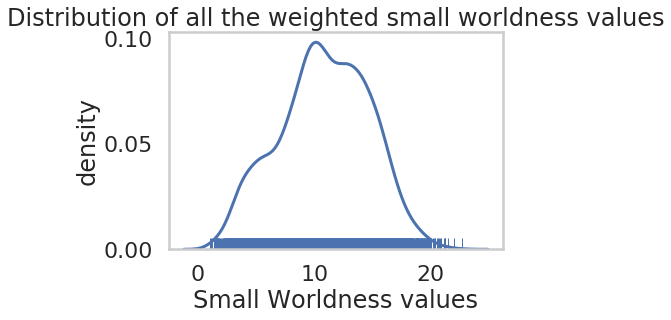

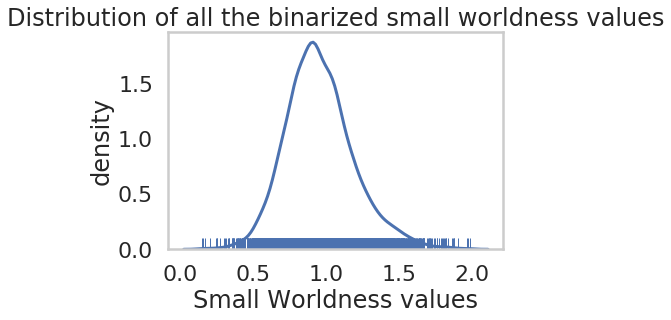

In [44]:
# distribution of the small worldness
values = df[f"wei_small_worldness"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("Small Worldness values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the weighted small worldness values")
save_figure(f"{OUT_DIR}wei_small_worldness.png")

values = df[f"bin_small_worldness"]
ax = sns.distplot(values, hist=False, rug=True)

    
ax.set_xlabel("Small Worldness values")
ax.set_ylabel("density")
ax.set_title("Distribution of all the binarized small worldness values")
save_figure(f"{OUT_DIR}bin_small_worldness.png")

In [31]:
for column in df.columns:
    print(column)

p_id
frequency
epoch
graph
window
mean_1
mean_2
mean_3
mean_4
mean_5
mean_6
mean_7
mean_8
mean_9
mean_10
mean_11
mean_12
mean_13
mean_14
mean_15
mean_16
mean_17
mean_18
mean_19
mean_20
mean_21
mean_22
mean_23
mean_24
mean_25
mean_26
mean_27
mean_28
mean_29
mean_30
mean_31
mean_32
mean_33
mean_34
mean_35
mean_36
mean_37
mean_38
mean_39
mean_40
mean_41
mean_42
mean_43
mean_44
mean_45
mean_46
mean_47
mean_48
mean_49
mean_50
mean_51
mean_52
mean_53
mean_54
mean_55
mean_56
mean_57
mean_58
mean_59
mean_60
mean_61
mean_62
mean_63
mean_64
mean_65
mean_66
mean_67
mean_68
mean_69
mean_70
mean_71
mean_72
mean_73
mean_74
mean_75
mean_76
mean_77
mean_78
mean_79
mean_80
mean_81
mean_82
std_1
std_2
std_3
std_4
std_5
std_6
std_7
std_8
std_9
std_10
std_11
std_12
std_13
std_14
std_15
std_16
std_17
std_18
std_19
std_20
std_21
std_22
std_23
std_24
std_25
std_26
std_27
std_28
std_29
std_30
std_31
std_32
std_33
std_34
std_35
std_36
std_37
std_38
std_39
std_40
std_41
std_42
std_43
std_44
std_45
std_46
std_47

In [33]:
df['bin_norm_avg_clust_coeff']

0       0.97034
1       0.90365
2       0.85801
3       0.81344
4       0.72413
         ...   
4121    0.55731
4122    0.94798
4123    1.25770
4124    0.80821
4125    0.81059
Name: bin_norm_avg_clust_coeff, Length: 4126, dtype: float64

In [35]:
import sys
import pickle
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#import config as cfg
import commons as cfg
from ml_tools.classification import bootstrap_interval
from commons import load_pickle, find_best_model, filter_dataframe
from sklearn.preprocessing import MinMaxScaler


# Here the goal is to generate the final mean and std deviation data points and output them as CSV
columns_name = ['epoch', 'graph']
weight_data = {
    'epoch':  [],
    'graph': []
    }

for i in range(82):
    weight_data[f"mean_{i}"] = []
    columns_name = columns_name + [f"mean_{i}"]

for i in range(82):
    weight_data[f"std_{i}"] = []
    columns_name = columns_name + [f"std_{i}"]
    

# Get the weights out of the best classification
for graph in ["aec", "pli"]:
    for epoch in ["emf5", "eml5"]:
        print(f"{graph} at {epoch}")
        best_clf_data = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func.pickle")
        
        
        clf = find_best_model(best_clf_data['best_params'])
        print(clf)
        pipe = Pipeline([
            ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
            ('scaler', StandardScaler()),
            ('clf', clf)])
        
        df = pd.read_csv(f"{IN_DIR}features.csv")
        X, y, group = filter_dataframe(graph, epoch, "func")
        pipe.fit(X,y)
        
        scaler = MinMaxScaler(feature_range=(0,0.5))
        data = []
        data = np.transpose(np.array([pipe.steps[2][1].coef_[0]]))
        weights = scaler.fit_transform(data)
        mean_weight = weights[0:82]
        std_weight = weights[82:164]
        
        weight_data['epoch'] = weight_data['epoch'] + [epoch]
        weight_data['graph'] = weight_data['graph'] + [graph]
        
        print(f"std_weight = [")
        for i, weight in enumerate(std_weight):
            print(f"{weight[0]}")
            weight_data[f"std_{i}"] = weight_data[f"std_{i}"] + [weight[0]]
        print(f"]")
        
        print(f"mean_weight = [")
        for i, weight in enumerate(mean_weight):
            print(f"{weight[0]}")
            weight_data[f"mean_{i}"] = weight_data[f"mean_{i}"] + [weight[0]]
        print(f"]")
        
df = pd.DataFrame(weight_data)
df.to_csv('weights_data.csv', index=False)
df

aec at emf5
svc_0.1 : 1
log_1.0 : 8
LogisticRegression(max_iter=1000)
Feature Group: func:
      p_id  frequency  epoch  graph  window    mean_1    mean_2    mean_3  \
0        1          1      1      1       1  0.203890  0.193700  0.176580   
1        1          1      1      1       2  0.170380  0.175840  0.200030   
2        1          1      1      1       3  0.105010  0.209070  0.168900   
3        1          1      1      1       4  0.102370  0.164460  0.168260   
4        1          1      1      1       5  0.086757  0.131710  0.094693   
...    ...        ...    ...    ...     ...       ...       ...       ...   
3826     9          1      2      1      55 -0.016992  0.028776  0.066921   
3827     9          1      2      1      56  0.038595  0.016059  0.107800   
3828     9          1      2      1      57  0.104140  0.049441  0.091478   
3829     9          1      2      1      58  0.126830  0.069942  0.089623   
3830     9          1      2      1      59  0.073749  0.05504

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Feature Group: func:
      p_id  frequency  epoch  graph  window    mean_1   mean_2    mean_3  \
0        1          1      1      1       1  0.203890  0.19370  0.176580   
1        1          1      1      1       2  0.170380  0.17584  0.200030   
2        1          1      1      1       3  0.105010  0.20907  0.168900   
3        1          1      1      1       4  0.102370  0.16446  0.168260   
4        1          1      1      1       5  0.086757  0.13171  0.094693   
...    ...        ...    ...    ...     ...       ...      ...       ...   
3944     9          1      3      1      55  0.084233  0.11299  0.037910   
3945     9          1      3      1      56  0.166920  0.18620  0.141260   
3946     9          1      3      1      57  0.161620  0.13786  0.155020   
3947     9          1      3      1      58  0.201970  0.16764  0.170030   
3948     9          1      3      1      59  0.244790  0.20345  0.146170   

        mean_4    mean_5  ...    std_73    std_74    std_75    std

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Feature Group: func:
      p_id  frequency  epoch  graph  window    mean_1    mean_2    mean_3  \
57       1          1      1      2       1  0.122360  0.149450  0.126000   
58       1          1      1      2       2  0.079975  0.039975  0.088850   
59       1          1      1      2       3  0.044714  0.034798  0.025539   
60       1          1      1      2       4  0.028129  0.057812  0.039518   
61       1          1      1      2       5  0.055699  0.051892  0.034895   
...    ...        ...    ...    ...     ...       ...       ...       ...   
3885     9          1      2      2      55  0.095661  0.065680  0.097734   
3886     9          1      2      2      56  0.098810  0.051564  0.087035   
3887     9          1      2      2      57  0.117610  0.056242  0.085210   
3888     9          1      2      2      58  0.160000  0.070681  0.089937   
3889     9          1      2      2      59  0.118550  0.059316  0.060686   

        mean_4    mean_5  ...    std_73   std_74    st

C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\User\Anaconda3\envs\AEC-wPLI-comparison\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Feature Group: func:
      p_id  frequency  epoch  graph  window    mean_1    mean_2    mean_3  \
57       1          1      1      2       1  0.122360  0.149450  0.126000   
58       1          1      1      2       2  0.079975  0.039975  0.088850   
59       1          1      1      2       3  0.044714  0.034798  0.025539   
60       1          1      1      2       4  0.028129  0.057812  0.039518   
61       1          1      1      2       5  0.055699  0.051892  0.034895   
...    ...        ...    ...    ...     ...       ...       ...       ...   
4003     9          1      3      2      55  0.029999  0.056261  0.032961   
4004     9          1      3      2      56  0.042094  0.078459  0.027060   
4005     9          1      3      2      57  0.065941  0.039241  0.033755   
4006     9          1      3      2      58  0.068167  0.022955  0.036364   
4007     9          1      3      2      59  0.104700  0.072245  0.039685   

        mean_4    mean_5  ...    std_73    std_74    s

,epoch,graph,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,...,std_72,std_73,std_74,std_75,std_76,std_77,std_78,std_79,std_80,std_81
0,emf5,aec,0.135258,0.141361,0.356973,0.213871,0.233782,0.222902,0.261118,0.334820,...,0.119862,0.217023,0.199309,0.240876,0.155028,0.116378,0.092940,0.155367,0.244851,0.125209
1,eml5,aec,0.280667,0.000000,0.210167,0.230611,0.343485,0.311455,0.247577,0.284385,...,0.237284,0.180654,0.199440,0.284013,0.221870,0.292473,0.068075,0.177469,0.191391,0.229429
2,emf5,pli,0.137586,0.155843,0.271379,0.202147,0.272526,0.245955,0.209028,0.287927,...,0.227817,0.166428,0.346330,0.192253,0.273112,0.223960,0.108697,0.279348,0.310809,0.134291
3,eml5,pli,0.305056,0.279277,0.381939,0.138606,0.242754,0.464302,0.299072,0.281018,...,0.162893,0.162054,0.249557,0.430413,0.268354,0.158029,0.052314,0.242244,0.327104,0.216978
